In [1]:
import rasterio as rio
from rasterio.plot import plotting_extent
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors
import os
import seaborn as sns
plt.ion()
plt.rcParams['figure.figsize'] = (8, 8)
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [3]:
chirps = rio.open('test.tiff')

In [5]:
chirps.bounds

BoundingBox(left=37.334621429443374, bottom=7.262864112853989, right=38.12504577636718, top=7.9212145805358904)

In [6]:
chirps.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': 16,
 'height': 13,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.049401521682737926, 0.0, 37.334621429443374,
        0.0, -0.05064234366783859, 7.9212145805358904)}

In [7]:
chirps.count

1

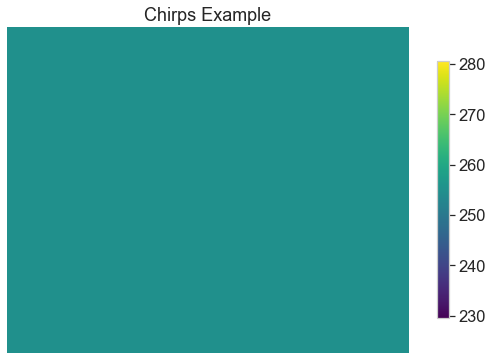

In [13]:
fig, ax = plt.subplots(figsize = (10,6))
chm_plot = ax.imshow(chirps.dataset_mask(), 
                     cmap='viridis')
fig.colorbar(chm_plot, fraction=.023, ax=ax)
ax.set_title(f"Chirps Example")
ax.set_axis_off();